In [111]:
import pandas as pd
import math 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

df = pd.read_csv('data1.csv', sep=',', header= None)

#print(df.values)

#Euclidean Norm function

def euc_norm(a, b):
    tot = 0
    tot = a**2 + b**2
    tot = math.sqrt(tot)
    return tot

def kmeans(k):
    num = k
    smallest_x = min(df[0])
    largest_x = max(df[0])
    smallest_y = min(df[1])
    largest_y = max(df[1])

    x = np.random.randint(low= smallest_x, high= largest_x, size = k)
    y = np.random.randint(low= smallest_y, high= largest_y, size = k)
    
    C = list(zip(x, y))
    #print(C)
    #assign the correct clusters to each point 
    #go through each point
    
    x_values = []
    y_values = []
    for i in range(len(df)):
        x_values.append(df[0][i])
        y_values.append(df[1][i])
   
    plt.scatter(x_values, y_values)
    for i in range(num):
        plt.scatter(C[i][0], C[i][1], c='black', s=200, alpha=0.5);
    plt.show()
    
    m = 0
    clusters = [0] * len(df)
    correct_k = 0
    while m < 50:
        #print(C) 
        for i in range(0, len(df)):
            dist = euc_norm(df[0][i]-C[0][0], df[1][i]-C[1][0])
            distances = []
            for k in C:
                distances.append(euc_norm(df[0][i]-k[0], df[1][i]-k[1]))  
            correct_k = np.argmin(distances)
            clusters[i] = correct_k
        df['clusters'] = clusters
        #print(clusters)

        #total of x values with the cluster of the key
        #total of y values with the cluster of the key
        Ax = 0
        Ay = 0
        Ax_vals = []
        Ay_vals = []
        pts = 0
        for i in range(num):
            for j in range(0, len(df)):
                    if (df['clusters'][j] == i):
                        Ax += df[0][j]
                        Ay += df[1][j]
                        pts += 1
            Ax_vals.append(Ax/pts)
            Ay_vals.append(Ay/pts)
            Ax = 0
            Ay = 0
            pts = 0
        D = list(zip(Ax_vals, Ay_vals))
        C = D
        #print(C)
        m +=1
    colors = [0] * len(df)    
    for i in range(len(df)):
        if (df['clusters'][i] == 0):
            colors[i] = 'purple'
        if(df['clusters'][i] == 1):
            colors[i] = 'green'
        if(df['clusters'][i] == 2):
            colors[i] = 'yellow'
        if(df['clusters'][i] == 3):
            colors[i] = 'red'
        if(df['clusters'][i] == 4):
            colors[i] = 'blue'
        if(df['clusters'][i] == 5):
            colors[i] = 'pink'
    df['colors'] = colors
    plt.scatter(x_values, y_values, c= colors)
    for i in range(num):
        plt.scatter(C[i][0], C[i][1], c='black', s=200, alpha=0.5);
    plt.show()

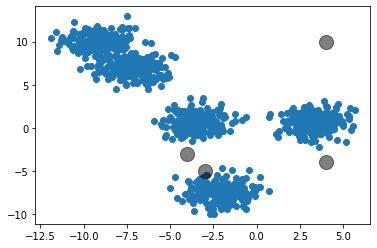

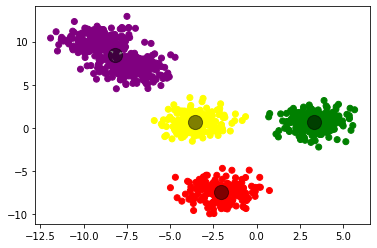

In [112]:
kmeans(4)